# Onboarding 

# Data Analysis 

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import seaborn as sns
from utils import *
plt.style.use('seaborn-v0_8')
%config InlineBackend.figure_format = 'svg'

In [2]:
# reading the data
df = pd.read_csv('data/homework_dataset.csv')

# converting the date column to pandas datetime format and removing index name
df.index = pd.to_datetime(df['Unnamed: 0'], format='%Y-%m-%d')

df = df.drop('Unnamed: 0', axis=1) # dropping the extra date column

# renaming the index column
df.index.name = 'Date [YYYY-MM-DD]'

## Target Deviation

The Machine Learning process making predictions on target variables can be quite complex and scary, but worry not, we have a simple formula to objectively quantify the performance of your model. 

The way we do this, is by utilizing the following formula: 

$$ target \ deviation = \sqrt{\frac{1}{N - 1}\ \sum_{i=1}^{N} (x_i - t)^2} $$

Where:

+ $N$ is the number of samples in the dataset
+ $x_i$ is the measured compressive strength of a sample 
+ $t$ is the target value of the sample (50 MPa)

Ideally, we want to minimize the target deviation, and keeping it below 1 MPa. 

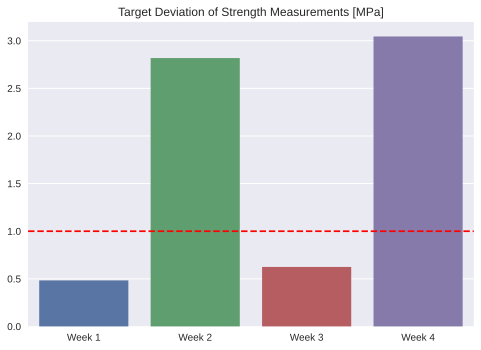

In [3]:
# creating a new column with the sample deviation for each data entry

x = df['strength (measured) [MPa]'].values
x_hat = df['strength (predicted) [MPa]'].values
t = 50 # [MPa]
df['sample variance [MPa]'] = sample_difference(x, t)

# creating a new column with the ratio of the measured and recommended fineness 

df['fineness ratio'] = df['fineness (measured) [μm]'] / df['fineness (recommended) [μm]']

# creating a subdataframe for each week of data

df_1, df_2, df_3, df_4 = weekly_split(df)

N1 = df_1.shape[0]
N2 = df_2.shape[0]
N3 = df_3.shape[0]
N4 = df_4.shape[0]

# computing the standard deviation for each week of data 

X1 = df_1['strength (measured) [MPa]'].values
X2 = df_2['strength (measured) [MPa]'].values
X3 = df_3['strength (measured) [MPa]'].values
X4 = df_4['strength (measured) [MPa]'].values

std_1 = target_deviation(X1, N1, t) 
std_2 = target_deviation(X2, N2, t)
std_3 = target_deviation(X3, N3, t)
std_4 = target_deviation(X4, N4, t) 

# defining the maximum standard deviation threshold

max_std_threshold = 1.0 # [MPa]

# plotting a bar chart of the weekly standard deviations and a threshold line

x = ['Week 1', 'Week 2', 'Week 3', 'Week 4']
y = [std_1, std_2, std_3, std_4]

plot_weekly_target_deviation(x, y, threshold=max_std_threshold)



## Evaluation 

The performance can be evaluated by the standard deviation metric defined earlier, which should be below 1 MPa. 

Week 1 and week 3 are well below the indicated threshold, however week 2 and week 4 are not. That means we should analyze other metrics to understand what is happening and act accordingly.

### Cement powder fineness 

The cement powder fineness is a measure of the size of the cement particles, on average. The smaller the particles, the stronger the concrete. 
Thankfully, we have available data on both predicted and actual cement powder fineness. By analyzing their ratio, we can understand if the real fineness has 
been overshot, when this value is greater than 1. 

Given that each week a single sample has been collected daily, we can plot the ratio over time for each week, and identify the days where the ratio is greater than 1.

Another factor impacting the ratio is the quality of the clinker, which is the main ingredient of cement. The clinker is produced by heating limestone and clay in a kiln, and the quality of the clinker is measured by the amount of $C3S$ phase present in the clinker. The higher the $C3S$ phase, the better the clinker.

Our dataset measures the $C3S$ clinker phase in percentage and we could use it as color data for each point in the plot, aided by a colorbar.

In [4]:
def set_daily_xticks_dictionary(df):
    '''Returns a dictionary of xticks for each day in a dataframe in the form 
    {'yyy-mm-dd': 'Mon', ...}.'''
    xticks_dict = {}
    for i in range(len(df)):
        xticks_dict[df.index[i].strftime('%Y-%m-%d')] = df.index[i].strftime('%a')
    return xticks_dict


/home/giorgio/Assignment/utils.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(xticks_dict1.values(), rotation=45)
/home/giorgio/Assignment/utils.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(xticks_dict2.values(), rotation=45)
/home/giorgio/Assignment/utils.py:95: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(xticks_dict3.values(), rotation=45)
/home/giorgio/Assignment/utils.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(xticks_dict4.values(), rotation=45)


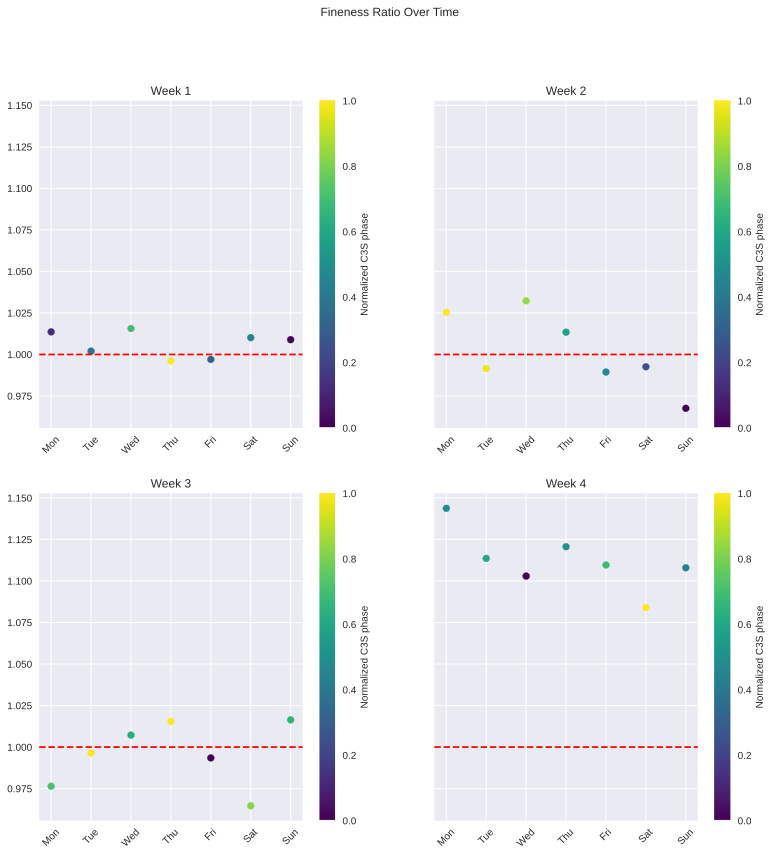

In [5]:
# plotting the fineness ratio over time, with 4 subplots for each week of data and a threshold line of 1.0 and using the clinker phase as the marker color
plot_daily_fineness_ratio(df_1, df_2, df_3, df_4)

In [6]:
df

,strength (measured) [MPa],strength (predicted) [MPa],fineness (measured) [μm],fineness (recommended) [μm],C3S clinker phase [%],sample variance [MPa],fineness ratio
Date [YYYY-MM-DD],,,,,,,
2023-05-01,49.75,50.30,20.12,19.85,59.58,0.25,1.013602
2023-05-02,50.07,50.15,19.97,19.93,59.85,0.07,1.002007
2023-05-03,49.68,50.30,20.16,19.85,60.17,0.32,1.015617
2023-05-04,49.24,49.07,20.38,20.46,60.49,0.76,0.996090
2023-05-05,50.12,50.01,19.94,20.00,59.76,0.12,0.997000
2023-05-06,50.12,50.53,19.94,19.74,59.91,0.12,1.010132
2023-05-07,49.21,49.59,20.39,20.21,59.45,0.79,1.008906
2023-05-08,49.62,50.61,20.19,19.69,59.40,0.38,1.025394
2023-05-09,48.23,49.90,19.88,20.05,59.24,1.77,0.991521
